In [3]:
import pyemma
import pickle
import os
import glob
import torch

import mdtraj as md
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np

np.bool = np.bool_

from tqdm import tqdm
from matplotlib.colors import LogNorm
from itertools import combinations

blue = (70 / 255, 110 / 255, 250 / 255)
green = (100 / 255, 170 / 255, 120 / 255)

molecule = "2F4K"
simulation_idx = 0
base_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-protein"
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"
pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/{molecule}_from_mae.pdb"

# String

In [113]:
name2letter = {
	"ALA": "A",
	"CYS": "C",
	"ASP": "D",
	"GLU": "E",
	"PHE": "F",
	"GLY": "G",
	"HIS": "H",
	"ILE": "I",
	"LYS": "K",
	"LEU": "L",
	"MET": "M",
	"ASN": "N",
	"PRO": "P",
	"GLN": "Q",
	"ARG": "R",
	"SER": "S",
	"THR": "T",
	"VAL": "V",
	"TRP": "W",
	"TYR": "Y",
	"NLE": "X",
}

pdb_traj = md.load_pdb(pdb_path) 
residue_names = [residue.name for residue in pdb_traj.topology.residues]
one_letter_str = ""
for idx, names in enumerate(residue_names):
    print(names)
    # print(f"Letter {idx}: {name2letter[names]}")
    one_letter_str += name2letter[names]
print(one_letter_str)
print(len(one_letter_str))

LEU
SER
ASP
GLU
ASP
PHE
LYS
ALA
VAL
PHE
GLY
MET
THR
ARG
SER
ALA
PHE
ALA
ASN
LEU
PRO
LEU
TRP
NLE
GLN
GLN
HIS
LEU
NLE
LYS
GLU
LYS
GLY
LEU
PHE
LSDEDFKAVFGMTRSAFANLPLWXQQHLXKEKGLF
35


In [5]:
# CA atom index
ca_atoms = [atom for atom in pdb_traj.topology.atoms if atom.name == "CA"]
ca_indices = [atom.index for atom in ca_atoms]

cnt = 1
for i in range(len(ca_indices)):
    for j in range(i+1, len(ca_indices)):
        print(f"d{cnt}: DISTANCE ATOMS={ca_indices[i]+1},{ca_indices[j]+1}")
        cnt += 1

d1: DISTANCE ATOMS=2,23
d2: DISTANCE ATOMS=2,34
d3: DISTANCE ATOMS=2,46
d4: DISTANCE ATOMS=2,61
d5: DISTANCE ATOMS=2,73
d6: DISTANCE ATOMS=2,93
d7: DISTANCE ATOMS=2,115
d8: DISTANCE ATOMS=2,125
d9: DISTANCE ATOMS=2,141
d10: DISTANCE ATOMS=2,161
d11: DISTANCE ATOMS=2,168
d12: DISTANCE ATOMS=2,185
d13: DISTANCE ATOMS=2,199
d14: DISTANCE ATOMS=2,223
d15: DISTANCE ATOMS=2,234
d16: DISTANCE ATOMS=2,244
d17: DISTANCE ATOMS=2,264
d18: DISTANCE ATOMS=2,274
d19: DISTANCE ATOMS=2,288
d20: DISTANCE ATOMS=2,307
d21: DISTANCE ATOMS=2,321
d22: DISTANCE ATOMS=2,340
d23: DISTANCE ATOMS=2,364
d24: DISTANCE ATOMS=2,383
d25: DISTANCE ATOMS=2,400
d26: DISTANCE ATOMS=2,417
d27: DISTANCE ATOMS=2,435
d28: DISTANCE ATOMS=2,454
d29: DISTANCE ATOMS=2,473
d30: DISTANCE ATOMS=2,495
d31: DISTANCE ATOMS=2,510
d32: DISTANCE ATOMS=2,532
d33: DISTANCE ATOMS=2,539
d34: DISTANCE ATOMS=2,558
d35: DISTANCE ATOMS=23,34
d36: DISTANCE ATOMS=23,46
d37: DISTANCE ATOMS=23,61
d38: DISTANCE ATOMS=23,73
d39: DISTANCE ATOMS=23,93
d

In [6]:
print("ARG=" + ",".join(f"d{i+1}" for i in range(cnt)))

ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,d150,d151,d152,d153,d154,d155,d156,d157,d158,d159,d160,d161,d162,d163,d164,d165,d166,d167,d168,d169,d170,d171,d172,d173,d174,d175,d176,d177,d178,d179,d180,d181,d182,d183,d184,d185,d186,d187,d188,d189,d190,d191,d192,d193,d194,d195,d196,d197,d198,d199,d200,d201,d202,d203,d204,d205,d206,d207,d208,d209,d210,d211,d212,d213,d214,d215,d216,d217,d218,d219,d220,d221

# Visualization

## Alignment

In [10]:
# Check .dcd files in the simulation directory
dcd_pattern = f"{base_dir}/{molecule}-{simulation_idx}-protein-*.dcd"
dcd_files = glob.glob(dcd_pattern)
num_files = len(dcd_files)
print(f"Found {num_files} .dcd files in {base_dir}")
print(f"Pattern used: {dcd_pattern}")

file_indices = []
for file_path in dcd_files:
    filename = os.path.basename(file_path)
    index_part = filename.split('-')[-1].replace('.dcd', '')
    if index_part.isdigit():
        file_indices.append(int(index_part))

file_indices.sort()
print(f"File indices range: {min(file_indices)} to {max(file_indices)}")
print(f"Total files to load: {len(file_indices)}")

Found 63 .dcd files in /home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein
Pattern used: /home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein/2F4K-0-protein-*.dcd
File indices range: 0 to 62
Total files to load: 63


In [11]:
# Load trajectories 
atom_mapping = np.array([1, 2, 7, 8, 3, 4, 5, 6, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 9, 10, 11, 12, 13, 14, 301, 302, 303, 304, 305, 15, 16, 17, 18, 19, 20, 21, 22, 306, 307, 308, 309, 23, 24, 25, 26, 27, 28, 29, 30, 31, 310, 311, 312, 313, 314, 315, 32, 33, 34, 35, 36, 37, 38, 39, 316, 317, 318, 319, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 320, 321, 322, 323, 324, 325, 326, 327, 328, 51, 52, 58, 59, 53, 54, 55, 56, 57, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 60, 61, 62, 63, 64, 342, 343, 344, 345, 346, 65, 66, 67, 68, 69, 70, 71, 347, 348, 349, 350, 351, 352, 353, 354, 355, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 356, 357, 358, 359, 360, 361, 362, 363, 364, 83, 84, 85, 86, 365, 366, 367, 87, 88, 89, 90, 91, 92, 93, 94, 368, 369, 370, 371, 372, 373, 374, 375, 376, 95, 96, 97, 98, 99, 100, 101, 377, 378, 379, 380, 381, 382, 383, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 113, 114, 115, 116, 117, 118, 397, 398, 399, 400, 401, 119, 120, 121, 122, 123, 402, 403, 404, 405, 406, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 407, 408, 409, 410, 411, 412, 413, 414, 415, 135, 136, 137, 138, 139, 416, 417, 418, 419, 420, 140, 141, 142, 143, 144, 145, 146, 147, 421, 422, 423, 424, 425, 426, 148, 149, 150, 151, 152, 153, 154, 155, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 156, 157, 158, 159, 160, 161, 162, 438, 439, 440, 441, 442, 443, 444, 163, 164, 165, 166, 167, 168, 169, 170, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 185, 186, 187, 188, 189, 190, 191, 192, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 193, 194, 195, 196, 197, 198, 199, 200, 201, 477, 478, 479, 480, 481, 482, 483, 484, 202, 203, 204, 205, 206, 207, 208, 209, 210, 485, 486, 487, 488, 489, 490, 491, 492, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 493, 494, 495, 496, 497, 498, 499, 500, 221, 222, 223, 224, 225, 226, 227, 228, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 229, 230, 231, 232, 233, 234, 235, 236, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 237, 238, 244, 245, 239, 240, 241, 242, 243, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 246, 247, 248, 249, 250, 251, 252, 253, 254, 536, 537, 538, 539, 540, 541, 255, 256, 262, 263, 257, 258, 259, 260, 261, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 264, 265, 266, 267, 555, 556, 557, 268, 269, 270, 271, 272, 273, 274, 275, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 276, 277, 285, 286, 278, 279, 280, 281, 282, 283, 284, 287, 569, 570, 571, 572, 573, 574, 575, 576, 577])
for i in tqdm(
    file_indices,
    desc="Aligning trajectories"
):
    file_idx = f"{i:03d}"
    file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}.dcd"
    if os.path.exists(file_path):
        traj = md.load_dcd(file_path, top=pdb_path)
        traj.xyz = traj.xyz[:, atom_mapping - 1]
        traj.save_dcd(f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}-aligned.dcd")

Aligning trajectories: 100%|██████████| 63/63 [00:28<00:00,  2.24it/s]


## Trajectory

In [12]:
# PDB
pdb_traj = md.load_pdb(pdb_path)
pdb_view = nv.show_mdtraj(
    pdb_traj,
    height="400px",
    width="400px"
)
pdb_view.add_representation("licorice", selection="protein")

print(pdb_traj)
pdb_view

<mdtraj.Trajectory with 1 frames, 577 atoms, 35 residues, and unitcells>


NGLWidget()

In [13]:
sample_file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-000-aligned.dcd"
sample_traj = md.load_dcd(sample_file_path, top=pdb_path)
print(sample_traj)

sample_traj.center_coordinates()
sample_view = nv.show_mdtraj(
    sample_traj,
    height="400px",
    width="400px"
)
sample_view.add_representation("licorice", selection="protein")
sample_view

<mdtraj.Trajectory with 10000 frames, 577 atoms, 35 residues, and unitcells>


NGLWidget(max_frame=9999)

In [14]:
# Check .dcd files in the simulation directory
dcd_pattern = f"{base_dir}/{molecule}-{simulation_idx}-protein-*-aligned.dcd"
dcd_files = glob.glob(dcd_pattern)
num_files = len(dcd_files)
print(f"Found {num_files} .dcd files in {base_dir}")
print(f"Pattern used: {dcd_pattern}")

file_indices = []
for file_path in dcd_files:
    filename = os.path.basename(file_path)
    index_part = filename.split('-')[-2].replace('.dcd', '')
    if index_part.isdigit():
        file_indices.append(int(index_part))

file_indices.sort()
print(f"File indices range: {min(file_indices)} to {max(file_indices)}")
print(f"Total files to load: {len(file_indices)}")

Found 63 .dcd files in /home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein
Pattern used: /home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein/2F4K-0-protein-*-aligned.dcd
File indices range: 0 to 62
Total files to load: 63


In [15]:
# Load trajectories 
traj_list = []
for i in tqdm(
    file_indices,
    desc="Loading trajectories"
):
    file_idx = f"{i:03d}"
    file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}-aligned.dcd"
    if os.path.exists(file_path):
        traj = md.load_dcd(file_path, top=pdb_path)
        traj_list.append(traj)
    else:
        print(f"Warning: File not found: {file_path}")

print(f"Successfully loaded {len(traj_list)} trajectory files")
all_traj = md.join(traj_list)

Loading trajectories: 100%|██████████| 63/63 [00:03<00:00, 17.12it/s]


Successfully loaded 63 trajectory files


In [17]:
print(all_traj)
all_traj.center_coordinates()

view = nv.show_mdtraj(
    all_traj,
	height="400px",
    width="400px"
)
view.add_representation("licorice", selection="protein")
view.add_representation('cartoon')
print(f"Total frames: {all_traj.n_frames}")
view

<mdtraj.Trajectory with 627907 frames, 577 atoms, 35 residues, and unitcells>
Total frames: 627907


NGLWidget(max_frame=627906)

In [72]:
view.frame = 1000

# Descriptors

In [25]:
ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)

# ca_pair_contacts, resid_pairs = md.compute_contacts(
# 	all_traj, scheme="ca", contacts=ca_resid_pair, periodic=False
# )
# torch.save(
#     torch.from_numpy(ca_pair_contacts),
#     f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad.pt"
# )

ca_pair_contacts = torch.load(
	f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad.pt"
).numpy()
print(ca_pair_contacts.shape)
print(ca_pair_contacts.mean())

(627907, 595)
1.3632259


In [9]:
exp = 2
ca_pair_distances_switch = (1 - (np.power(ca_pair_contacts, exp) / 0.8)) / (1 - (np.power(ca_pair_contacts, exp) / 0.8))
print(ca_pair_distances_switch.shape)
print(ca_pair_distances_switch.mean())

# torch.save(
#     torch.from_numpy(ca_pair_distances_switch),
# 	f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad-switch.pt"
# )

(627907, 595)
1.0


In [10]:
xyz = all_traj.xyz
print(xyz.shape)

# torch.save(
#     torch.from_numpy(xyz),
#     f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-pos.pt"
# )

(627907, 577, 3)


# TICA

In [19]:
def cad2switch(
    cad,
    cutoff: float = 0.8
) -> np.ndarray:
	if type(cad) == torch.Tensor:
		cad = cad.numpy()
	return (1 - np.power(cad / cutoff, 6)) / (1 - np.power(cad / cutoff, 12))

Loading TICA data from ../data/2F4K/2F4K_tica_coord_lag10.npy


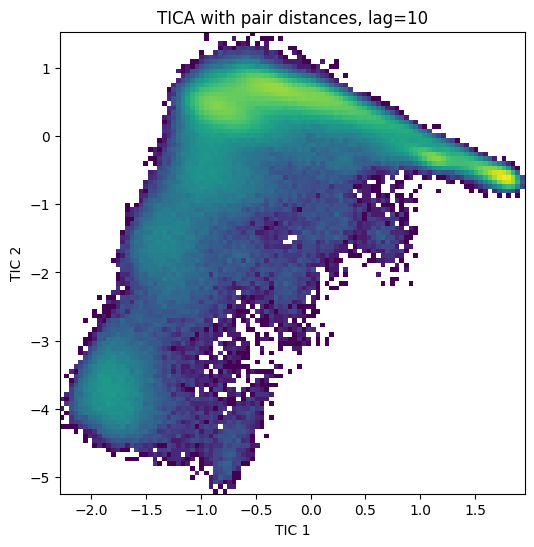

Loading TICA model from ../data/2F4K/2F4K_tica_model_lag100.pkl


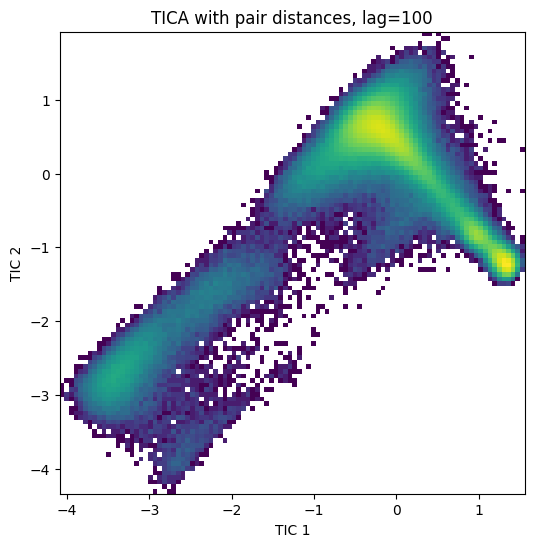

Loading TICA data from ../data/2F4K/2F4K_tica_coord_lag1000.npy


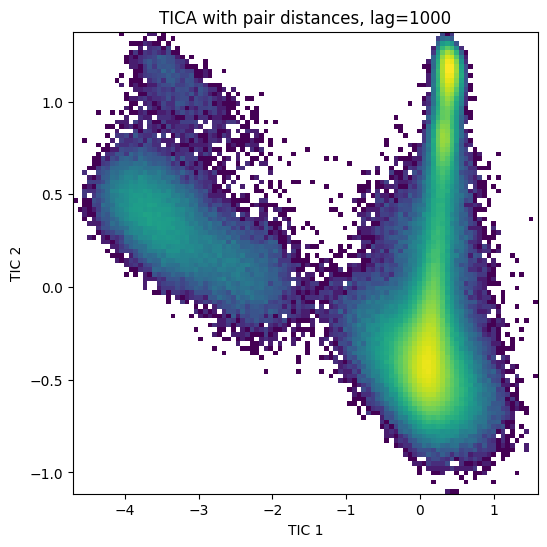

In [112]:
# TICA with pair distances
# pdb_state = md.load(pdb_path)
# pdb_state_ca_pair_distances, pdb_resid_pairs = md.compute_contacts(pdb_state, scheme="ca", contacts=ca_resid_pair, periodic=False)

for lag in (10, 100, 1000):
	tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
	if os.path.exists(tica_coord_path):
		print(f"Loading TICA data from {tica_coord_path}")
		tica_data = np.load(tica_coord_path)
	else:
		tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
		if os.path.exists(tica_model_path):
			print(f"Loading TICA model from {tica_model_path}")
			tica_model = pickle.load(open(tica_model_path, 'rb'))
			tica_data = tica_model.transform(ca_pair_contacts)
		else:
			print(f"Training TICA model with lag={lag}")
			tica_obj = pyemma.coordinates.tica(ca_pair_contacts, lag=lag, dim=2)
			with open(f'../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl', 'wb') as f:
				pickle.dump(tica_obj, f)
			tica_data = tica_obj.get_output()[0]
		np.save(tica_coord_path, tica_data)
	x = tica_data[:, 0]
	y = tica_data[:, 1]

	# pdb_tica_data = tica_obj.transform(pdb_state_ca_pair_distances)
	# pdb_tica_x = pdb_tica_data[:, 0]
	# pdb_tica_y = pdb_tica_data[:, 1]

	# Plot
	fig = plt.figure(figsize=(6, 6))
	ax = fig.add_subplot(111)
	ax.hist2d(x, y, bins=100, norm=LogNorm())
	# ax.scatter(pdb_tica_x, pdb_tica_y, color="red", s=100)
	ax.set_xlabel("TIC 1")
	ax.set_ylabel("TIC 2")
	plt.title(f"TICA with pair distances, lag={lag}")
	plt.savefig(f'../data/{molecule}/{molecule}_tica_model_lag{lag}.png')
	plt.show()
	plt.close()



# Analysis

## States to RMSD

In [29]:
def rmsd_to_refpdb(
	traj: md.Trajectory,
	reference_traj: md.Trajectory,
	atom_type: str = "ca",
) -> np.ndarray:
	"""
	Generate binary labels for folded/unfolded states based on RMSD
	"""
	if atom_type == "ca":
		atom_indices = traj.topology.select("name CA")
		print(atom_indices)
	else:
		atom_indices = None
	
	rmsd = md.rmsd(
		target = traj,
		reference = reference_traj,
		atom_indices = atom_indices
	)
	return rmsd

### Folded

[  1  22  33  45  60  72  92 114 124 140 160 167 184 198 222 233 243 263
 273 287 306 320 339 363 382 399 416 434 453 472 494 509 531 538 557]
0.61224556


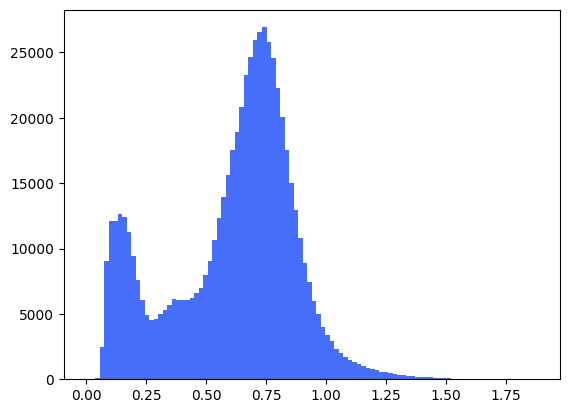

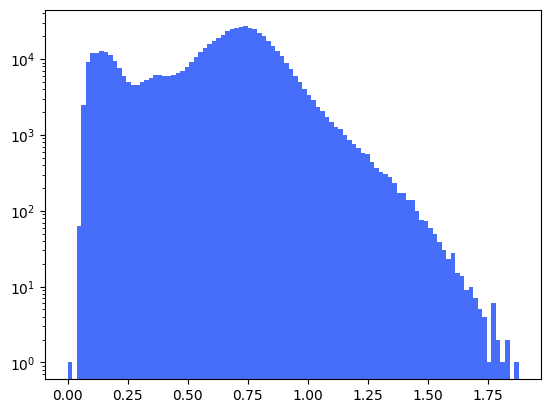

In [59]:
selected_frame = all_traj[7863]
rmsd_to_folded = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = selected_frame,
)

print(rmsd_to_folded.mean())
plt.hist(
    rmsd_to_folded,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()

plt.hist(
    rmsd_to_folded,
    bins=100,
    log=True,
    color=blue,
)
plt.show()

In [71]:
asdf = (rmsd_to_folded > 0.7) & (rmsd_to_folded < 0.8)
np.where(asdf[:1000])

(array([  9,  14,  15,  17,  18,  19,  20,  21,  22,  31,  40,  41,  42,
         43,  48,  49,  55,  99, 104, 116, 117, 118, 120, 121, 122, 123,
        124, 125, 126, 127, 129, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 147, 149, 150, 151, 152, 155, 159, 161, 169, 170, 172, 180,
        181, 189, 190, 192, 196, 197, 200, 201, 205, 224, 227, 250, 252,
        261, 264, 266, 267, 268, 270, 274, 275, 276, 279, 280, 281, 282,
        283, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 303,
        304, 305, 306, 307, 308, 309, 312, 313, 314, 315, 317, 318, 319,
        332, 337, 338, 341, 343, 344, 345, 348, 354, 355, 356, 357, 360,
        362, 363, 364, 365, 390, 391, 397, 398, 399, 402, 407, 408, 412,
        419, 420, 422, 427, 429, 430, 431, 432, 433, 435, 436, 440, 441,
        446, 447, 448, 450, 451, 452, 453, 456, 457, 460, 462, 463, 477,
        478, 479, 481, 482, 483, 484, 491, 492, 493, 502, 503, 504, 505,
        506, 507, 508, 510, 512, 513, 515, 516, 517

In [60]:
dssp_selected = md.compute_dssp(selected_frame)
print(dssp_selected.shape)
print(dssp_selected[0])
view_selected = nv.show_mdtraj(selected_frame)
view_selected.add_representation("licorice", selection="protein")
view_selected

(1, 35)
['C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H'
 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C']


NGLWidget()

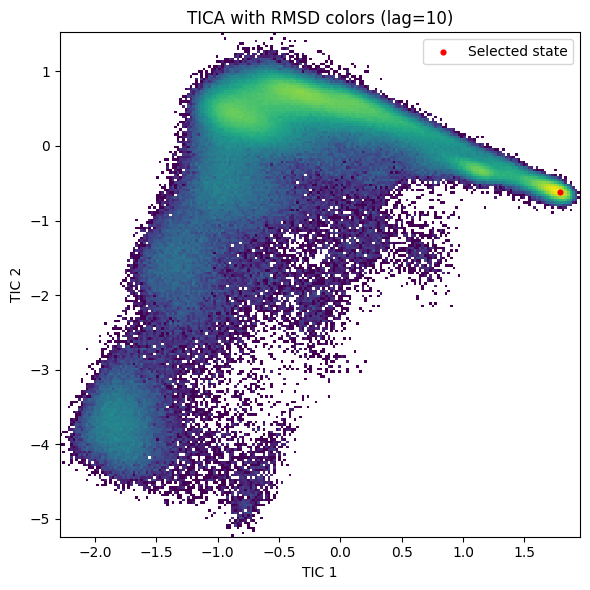

In [61]:
# pdb on TICA plot
lag = 10

ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)
selected_ca_pair_distances, resid_pairs = md.compute_contacts(
	selected_frame, scheme="ca", contacts=ca_resid_pair, periodic=False
)
tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
tica_model = pickle.load(open(tica_model_path, 'rb'))
tica_data_selected = tica_model.transform(selected_ca_pair_distances)
x_tica_selected = tica_data_selected[:, 0]
y_tica_selected = tica_data_selected[:, 1]

tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
tica_data = np.load(tica_coord_path)
x = tica_data[:, 0]
y = tica_data[:, 1]

# Plot TICA with RMSD colors
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.hist2d(x, y, bins=200, norm=LogNorm())
ax.scatter(
    x_tica_selected,
    y_tica_selected,
    c="red",
    s=20,
    edgecolors="k",
    linewidths=0,
    label="Selected state",
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.set_title(f"TICA with RMSD colors (lag={lag})")
ax.legend(loc="best")
plt.tight_layout()
plt.show()
plt.close()

In [62]:
rmsd_threshold = 0.4
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"

selected_frame.save_pdb(
	f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/folded.pdb"
)
torch.save(
    torch.from_numpy(rmsd_to_folded),
    f"{save_dir}/{molecule}-{simulation_idx}-rmsd.pt"
)
torch.save(
    torch.from_numpy(rmsd_to_folded < rmsd_threshold),
    f"{save_dir}/{molecule}-{simulation_idx}-label-rmsd-folded.pt"
)

### Unfolded

[  1  22  33  45  60  72  92 114 124 140 160 167 184 198 222 233 243 263
 273 287 306 320 339 363 382 399 416 434 453 472 494 509 531 538 557]
0.7798511


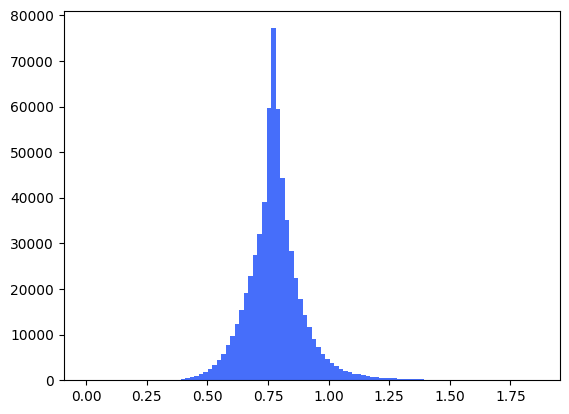

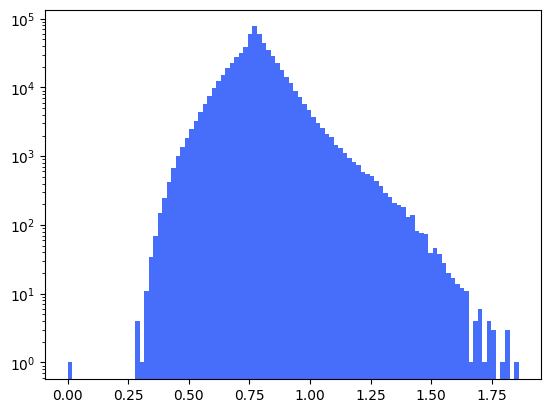

In [104]:
unfolded_selected_frame = all_traj[431]
unfolded_selected_rmsd = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = unfolded_selected_frame,
)

print(unfolded_selected_rmsd.mean())
plt.hist(
    unfolded_selected_rmsd,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()

plt.hist(
    unfolded_selected_rmsd,
    bins=100,
    log=True,
    color=blue,
)
plt.show()

In [105]:
unfolded_dssp_selected = md.compute_dssp(unfolded_selected_frame)
print(unfolded_dssp_selected.shape)
print(unfolded_dssp_selected[0])
unfolded_selected_view = nv.show_mdtraj(unfolded_selected_frame)
unfolded_selected_view.add_representation("licorice", selection="protein")
unfolded_selected_view

(1, 35)
['C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C']


NGLWidget()

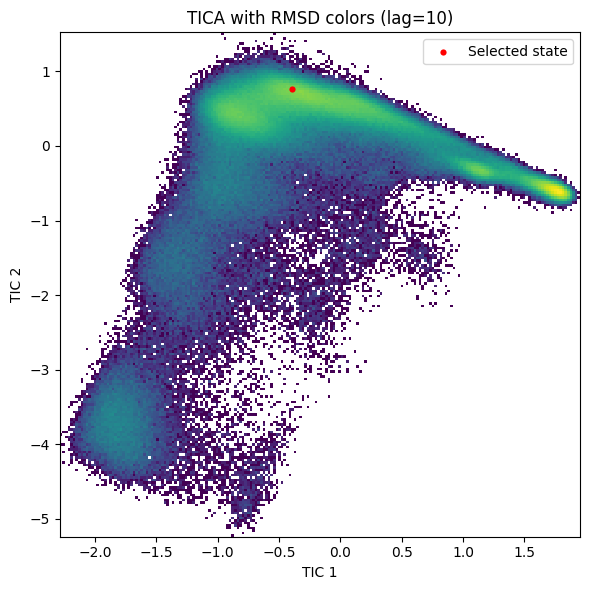

In [109]:
# pdb on TICA plot
lag = 10

ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)
selected_ca_pair_distances, resid_pairs = md.compute_contacts(
	unfolded_selected_frame, scheme="ca", contacts=ca_resid_pair, periodic=False
)
tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
tica_model = pickle.load(open(tica_model_path, 'rb'))
tica_data_selected = tica_model.transform(selected_ca_pair_distances)
x_tica_selected = tica_data_selected[:, 0]
y_tica_selected = tica_data_selected[:, 1]

tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
tica_data = np.load(tica_coord_path)
x = tica_data[:, 0]
y = tica_data[:, 1]

# Plot TICA with RMSD colors
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.hist2d(x, y, bins=200, norm=LogNorm())
ax.scatter(
    x_tica_selected,
    y_tica_selected,
    c="red",
    s=20,
    edgecolors="k",
    linewidths=0,
    label="Selected state",
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.set_title(f"TICA with RMSD colors (lag={lag})")
ax.legend(loc="best")
plt.tight_layout()
plt.show()
plt.close()

In [110]:
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"

unfolded_selected_frame.save_pdb(
	f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/unfolded.pdb"
)
torch.save(
    torch.from_numpy(unfolded_selected_rmsd),
    f"{save_dir}/{molecule}-{simulation_idx}-rmsd_unfolded.pt"
)

# Conclusion